In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv ('clean_dataframe.csv')
df.head()

,index_id,category,auction_id,date,location,original_currency,total_sale,nooflots,lot,title,descr,measures,min_estimated,max_estimated,realized
0,0,Antiquities,19876,8 December 2021,London,GBP,6407750,152,1,AN ATTIC BLACK-FIGURED TREFOIL-LIPPED OINOCHOE,"ATTRIBUTED TO THE GELA PAINTER, CIRCA 510-490 ...",6 3⁄4 in. (17.2 cm.) high,6000,8000,8125
1,1,Antiquities,19876,8 December 2021,London,GBP,6407750,152,2,A GREEK MEGARIAN WARE POTTERY BOWL,"HELLENISTIC PERIOD, CIRCA 2ND CENTURY B.C.",5 5⁄8 in. (14.2 cm.) diameter,400,600,1500
2,2,Antiquities,19876,8 December 2021,London,GBP,6407750,152,3,AN ATTIC WHITE-GROUND LEKYTHOS,CIRCA MID 5TH CENTURY B.C.,11 1⁄2 in. (29.2 cm.) high,8000,12000,18750
3,3,Antiquities,19876,8 December 2021,London,GBP,6407750,152,5,SEVEN GREEK TERRACOTTAS,"HELLENISTIC PERIOD, CIRCA 3RD-2ND CENTURY B.C.",4 3⁄8 in. (11 cm.) long max.,2500,3500,4375
4,4,Antiquities,19876,8 December 2021,London,GBP,6407750,152,6,AN ETRUSCAN BRONZE HANDLE FRAGMENT,CIRCA 5TH-4TH CENTURY B.C.,8 3⁄8 in. (21.3 cm.) high,1500,2500,2500


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import math # floor
import scipy.stats as st
import statistics as stats

# sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae

# don't show annying warnings 
import warnings
warnings.filterwarnings("ignore")


In [4]:
# show the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index_id           10357 non-null  int64 
 1   category           10357 non-null  object
 2   auction_id         10357 non-null  int64 
 3   date               10357 non-null  object
 4   location           10357 non-null  object
 5   original_currency  10357 non-null  object
 6   total_sale         10357 non-null  int64 
 7   nooflots           10357 non-null  int64 
 8   lot                10357 non-null  object
 9   title              10357 non-null  object
 10  descr              10256 non-null  object
 11  measures           10357 non-null  object
 12  min_estimated      10357 non-null  int64 
 13  max_estimated      10357 non-null  int64 
 14  realized           10357 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 1.2+ MB


In [5]:
# Show the dataframe shape
df.shape

(10357, 15)

In [6]:
df.columns.to_list()

['index_id',
 'category',
 'auction_id',
 'date',
 'location',
 'original_currency',
 'total_sale',
 'nooflots',
 'lot',
 'title',
 'descr',
 'measures',
 'min_estimated',
 'max_estimated',
 'realized']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index_id           10357 non-null  int64 
 1   category           10357 non-null  object
 2   auction_id         10357 non-null  int64 
 3   date               10357 non-null  object
 4   location           10357 non-null  object
 5   original_currency  10357 non-null  object
 6   total_sale         10357 non-null  int64 
 7   nooflots           10357 non-null  int64 
 8   lot                10357 non-null  object
 9   title              10357 non-null  object
 10  descr              10256 non-null  object
 11  measures           10357 non-null  object
 12  min_estimated      10357 non-null  int64 
 13  max_estimated      10357 non-null  int64 
 14  realized           10357 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 1.2+ MB


In [8]:
# quick NaNs check if a column contains NaN's  
df.isna().any()

index_id             False
category             False
auction_id           False
date                 False
location             False
original_currency    False
total_sale           False
nooflots             False
lot                  False
title                False
descr                 True
measures             False
min_estimated        False
max_estimated        False
realized             False
dtype: bool

In [9]:
# if a column has NaNs, check how many NaN's x column
df.isnull().sum()

index_id               0
category               0
auction_id             0
date                   0
location               0
original_currency      0
total_sale             0
nooflots               0
lot                    0
title                  0
descr                101
measures               0
min_estimated          0
max_estimated          0
realized               0
dtype: int64

In [10]:
# check's missing values / percentage of missing values
for var in df.columns:
    if df[var].isnull().sum()>0:
        print(var, df[var].isnull().mean())

descr 0.009751858646326156


In [11]:
# proportion nulls snapshot table 
nullsdf=pd.DataFrame(round(df.isna().sum()/len(df),4)*100)
nullsdf=nullsdf.rename(columns={'index':'header',0:'proportionnulls'})
nullsdf

,proportionnulls
index_id,0.00
category,0.00
auction_id,0.00
date,0.00
location,0.00
original_currency,0.00
total_sale,0.00
nooflots,0.00
lot,0.00
title,0.00


In [12]:
df['location'].value_counts()

New York                                 4655
London                                   2311
London, South Kensington                 1839
Amsterdam                                 887
Paris                                     407
Christie's Special Exhibition Gallery     258
Name: location, dtype: int64

In [13]:
df['category'].value_counts()

Antiquities                                                                                                           5905
Twenty rooms: The private collection of the late Mrs Elias-Vaes                                                        887
Ancient Jewelry                                                                                                        617
A Palladian Villa By Michael S. Smith                                                                                  345
Collection Jean-Philippe Mariaud de Serres                                                                             314
The Collection of Drue Heinz Townhouses in London and New York with interiors by John Fowler and Renzo Mongiardino     274
Michael Taylor and the Alchemy of Design: The Diana Dollar Knowles Collection                                          204
The William F. Reilly Collection                                                                                       173
Antiquities Incl

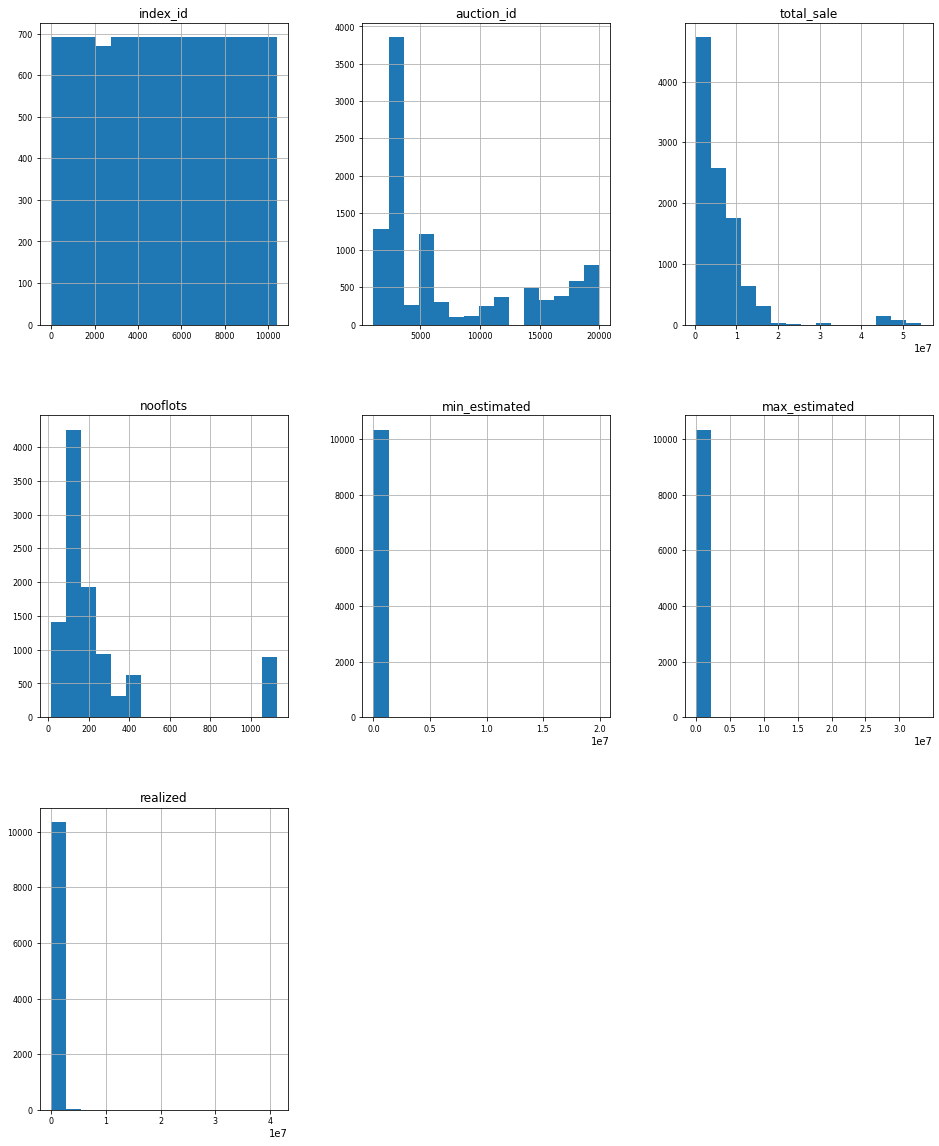

In [14]:
df.hist(figsize=(16, 20), bins=15, xlabelsize=8, ylabelsize=8);

In [15]:
# check if there are duplicates (the whole row)
df.duplicated().sum()
# o duplicates = no duplicates found

0

In [16]:
# check how many uniques are in the dataset
df.nunique()

index_id             10357
category                31
auction_id              87
date                    70
location                 6
original_currency        3
total_sale              87
nooflots                72
lot                   1116
title                 7650
descr                 4136
measures              6883
min_estimated          171
max_estimated          190
realized               676
dtype: int64

In [17]:
# check for duplicated ids
df['title'].duplicated().any()

True

In [18]:
# check for duplicated ids
df['title'].value_counts()

AN ATTIC BLACK-FIGURED NECK-AMPHORA                                    42
A ROMAN CARNELIAN RINGSTONE                                            42
AN ATTIC RED-FIGURED KYLIX                                             31
AN EGYPTIAN ALABASTER JAR                                              30
AN EGYPTIAN BRONZE CAT                                                 28
                                                                       ..
A MINOAN POTTERY JAR                                                    1
A MYCENAEAN POTTERY AMPHORA                                             1
A WESTERN ASIATIC BRONZE HELMET                                         1
TWO ROMAN GLASS BOTTLES                                                 1
A GRAECO-ROMAN ARCHAISTIC MARBLE HERM HEAD OF THE HERMES PROPYLAIOS     1
Name: title, Length: 7650, dtype: int64

In [19]:
duplicated_titles = df[df.duplicated(subset=['title'], keep=False)]

In [20]:
duplicated_titles['title'].value_counts()

A ROMAN CARNELIAN RINGSTONE            42
AN ATTIC BLACK-FIGURED NECK-AMPHORA    42
AN ATTIC RED-FIGURED KYLIX             31
AN EGYPTIAN ALABASTER JAR              30
AN EGYPTIAN BRONZE CAT                 28
                                       ..
A LATE ROMAN GLASS BOTTLE               2
A BYZANTINE GLASS FLASK                 2
A CANOSAN POTTERY OINOCHOE              2
A SARDINIAN BRONZE ARCHER               2
A PIRAVEND BRONZE MALE FIGURE           2
Name: title, Length: 967, dtype: int64

In [21]:
duplicated_titles.head()

,index_id,category,auction_id,date,location,original_currency,total_sale,nooflots,lot,title,descr,measures,min_estimated,max_estimated,realized
2,2,Antiquities,19876,8 December 2021,London,GBP,6407750,152,3,AN ATTIC WHITE-GROUND LEKYTHOS,CIRCA MID 5TH CENTURY B.C.,11 1⁄2 in. (29.2 cm.) high,8000,12000,18750
5,5,Antiquities,19876,8 December 2021,London,GBP,6407750,152,7,AN ATTIC BLACK-FIGURED HYDRIA,"ATTRIBUTED TO THE LEAGROS GROUP, CIRCA 520-510...",19 1⁄2 in. (49.5 cm.) high,60000,80000,118750
6,6,Antiquities,19876,8 December 2021,London,GBP,6407750,152,8,AN ETRUSCAN BRONZE MIRROR,CIRCA 3RD-2ND CENTURY B.C.,7 13⁄16 in. (19.9 cm.) high,1500,2000,4000
8,8,Antiquities,19876,8 December 2021,London,GBP,6407750,152,11,AN ETRUSCAN BRONZE VOTIVE FEMALE FIGURE,CIRCA EARLY 5TH CENTURY B.C.,4 3⁄8 in. (11 cm.) high,4000,6000,6875
9,9,Antiquities,19876,8 December 2021,London,GBP,6407750,152,12,AN ATTIC RED-FIGURED NOLAN AMPHORA,"ATTRIBUTED TO HERMONAX, CIRCA 470 B.C.",13 3⁄16 in. (33.5 cm.) high,70000,90000,387500


In [22]:
#data types
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['index_id', 'auction_id', 'total_sale', 'nooflots', 'min_estimated', 'max_estimated', 'realized'], object: ['category', 'date', 'location', 'original_currency', 'lot', 'title', 'descr', 'measures']}

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index_id           10357 non-null  int64 
 1   category           10357 non-null  object
 2   auction_id         10357 non-null  int64 
 3   date               10357 non-null  object
 4   location           10357 non-null  object
 5   original_currency  10357 non-null  object
 6   total_sale         10357 non-null  int64 
 7   nooflots           10357 non-null  int64 
 8   lot                10357 non-null  object
 9   title              10357 non-null  object
 10  descr              10256 non-null  object
 11  measures           10357 non-null  object
 12  min_estimated      10357 non-null  int64 
 13  max_estimated      10357 non-null  int64 
 14  realized           10357 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 1.2+ MB


<AxesSubplot:>

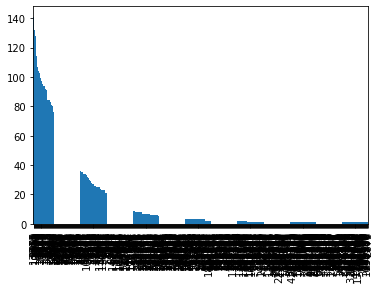

In [24]:
df.realized.value_counts().plot(kind='bar')

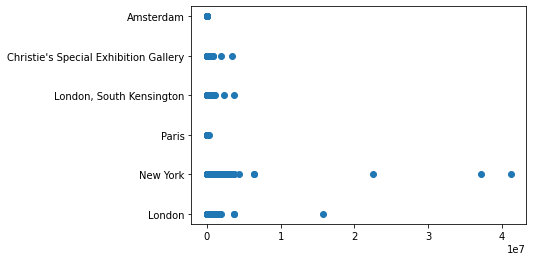

In [25]:
plt.scatter(df.realized,df.location)

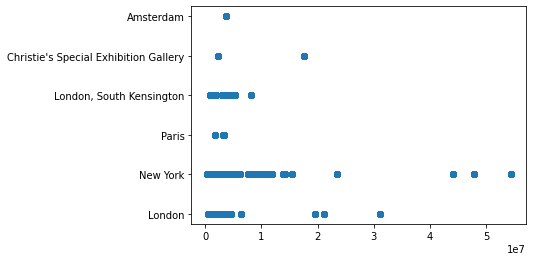

In [26]:
plt.scatter(df.total_sale,df.location)

In [27]:
df_byloc = df.groupby('location').agg({'total_sale':['mean', 'min', 'max'],
                                      'realized':['mean', 'min', 'max'],
                                      'min_estimated':['mean', 'min', 'max'],
                                      'max_estimated':['mean', 'min', 'max']
                                      })
round(df_byloc)

total_sale                    realized  \
                                             mean      min       max     mean   
location                                                                        
Amsterdam                               3655167.0  3655167   3655167   3091.0   
Christie's Special Exhibition Gallery  11313753.0  2221348  17553639  70968.0   
London                                  3749374.0   442000  31048500  45130.0   
London, South Kensington                3962930.0   934850   8080562  18543.0   
New York                                9503820.0   273481  54393010  86049.0   
Paris                                   2980817.0  1668273   3351786   8681.0   

                                                      min_estimated       \
                                        min       max          mean  min   
location                                                                   
Amsterdam                                36     43290        1292.0   58   
Christie's Special Exhibition Gallery  1081   3386845       42905.0  931   
London                                  250  15762500       20868.0  250   
London, South Kensington                188   3681250        7371.0  200   
New York                                 83  41188437       40047.0  133   
Paris                                    58    324090        3590.0    0   

                                                max_estimated                  
                                            max          mean   min       max  
location                                                                       
Amsterdam                                 23400        1935.0    93     46800  
Christie's Special Exhibition Gallery   2660000       63612.0  1197   3990000  
London                                  4000000       31912.0   400   6000000  
London, South Kensington                 400000       10937.0   300    600000  
New York                               19950000       60982.0   266  33250000  
Paris                                     93600        5288.0    35    140400

In [28]:
min_est_diff = df.groupby('total_sale')['min_estimated'].agg(['max','min'])
min_est_diff['diff'] = min_est_diff['max']-min_est_diff['min']
min_est_diff['diff']

total_sale
273481          9576
442000         27000
731416         22876
820625         58000
845000         78500
              ...   
23526702     1024100
31048500     3940000
44145526     3988670
47752153    13299335
54393010    19870200
Name: diff, Length: 87, dtype: int64

In [29]:
df.groupby('title')['realized'].mean()

title
A  PAIR OF CHINESE HARDWOOD STORM LANTERNS     2826.0
A  ROMAN BANDED AGATE RINGSTONE                3325.0
A  ROMAN CARNELIAN RINGSTONE                   4987.0
A 'CAMPANA' FRAGMENTARY TERRACOTTA RELIEF      1625.0
A 'KENTIAN'-STYLE SILVERED PINE SIDE TABLE     6875.0
                                               ...   
WHITE WING SCOTER DRAKE                       15793.0
WHITE WINGED SCOTER                            5818.0
WHITE-WINGED SCOTER                            2992.0
WOOD DUCK DRAKE AND HEN                       83125.0
YELLOWLEGS                                     8423.0
Name: realized, Length: 7650, dtype: float64

In [30]:
df.groupby('location')['realized'].mean()

location
Amsterdam                                 3091.047351
Christie's Special Exhibition Gallery    70968.120155
London                                   45129.814366
London, South Kensington                 18542.707993
New York                                 86049.378518
Paris                                     8681.221130
Name: realized, dtype: float64

In [31]:
df.groupby('min_estimated')['realized'].mean()

min_estimated
0               1608.00
23               702.00
35               219.00
58              1190.00
70              1407.25
               ...     
3325000      3208625.00
3990000     13391437.50
4000000     15762500.00
13300000    41188437.00
19950000    37087050.00
Name: realized, Length: 171, dtype: float64

In [32]:
df.groupby('min_estimated')['realized'].std()

min_estimated
0                    NaN
23                   NaN
35                   NaN
58          1.854176e+03
70          3.651925e+02
                ...     
3325000              NaN
3990000     1.281601e+07
4000000              NaN
13300000             NaN
19950000             NaN
Name: realized, Length: 171, dtype: float64

In [33]:
df_max_price = df['realized'].max()
print("The highest price for which a piece has been sold is:", round(df_max_price))
df_min_price = df['realized'].min()
print("The lowest price for which a piece has been sold is:", round(df_min_price))

The highest price for which a piece has been sold is: 41188437
The lowest price for which a piece has been sold is: 36


In [34]:
# which is the lowest price ?
df.loc[df['realized']==df['realized'].min(),:]

,index_id,category,auction_id,date,location,original_currency,total_sale,nooflots,lot,title,descr,measures,min_estimated,max_estimated,realized
9324,9346,Twenty rooms: The private collection of the la...,2857,27 April 2010,Amsterdam,EUR,3655167,1128,1177,AN ENGRAVED GILT-BRASS CARD-BOX,CIRCA 1900,7.5 CM. LONG,117,175,36
9341,9363,Twenty rooms: The private collection of the la...,2857,27 April 2010,Amsterdam,EUR,3655167,1128,1202,A SKETCH OF A DOG,FIRST HALF 20TH CENTURY,28.5 X 29.5 CM.,117,175,36


In [35]:
# which is the highest price ?
df.loc[df['realized']==df['realized'].max(),:]

,index_id,category,auction_id,date,location,original_currency,total_sale,nooflots,lot,title,descr,measures,min_estimated,max_estimated,realized
1788,1789,Antiquities,15793,31 October 2018,New York,USD,47752153,85,101,AN ASSYRIAN GYPSUM RELIEF OF A WINGED GENIUS,"REIGN OF ASHURNASIRPAL II, CIRCA 883-859 B.C.","7 ft., 4 in. x 6 ft., 5 in. (223.5 cm. x 195.5...",13300000,19950000,41188437


In [36]:
highest_lowest = df.agg({'realized':['min', 'max'],
                         'total_sale':['min', 'max'],
                        'min_estimated':['min', 'max'],
                        'max_estimated':['min', 'max']})
round(highest_lowest)

,realized,total_sale,min_estimated,max_estimated
min,36,273481,0,35
max,41188437,54393010,19950000,33250000


In [37]:
df.loc[df['max_estimated']==df['max_estimated'].min(),:]

,index_id,category,auction_id,date,location,original_currency,total_sale,nooflots,lot,title,descr,measures,min_estimated,max_estimated,realized
7361,7383,Collection Jean-Philippe Mariaud de Serres,1054,16 February 2011,Paris,EUR,3203357,374,96,MASQUE PASSEPORT DE STYLE DAN,CÔTE D'IVOIRE,Hauteur: 15 cm (6 in.),23,35,702


## IQR

In [38]:
# find price quartiles
iqr=np.percentile(df['max_estimated'],75)-np.percentile(df['max_estimated'],25)
iqr

13460.0

In [39]:
# find price quartiles
iqr=np.percentile(df['min_estimated'],75)-np.percentile(df['min_estimated'],25)
iqr

9140.0

In [40]:
# find price quartiles
iqr=np.percentile(df['realized'],75)-np.percentile(df['realized'],25)
iqr

20592.0

In [41]:
upper_limit = np.percentile(df['realized'],75)+ 1.5*iqr
upper_limit

54638.0

In [42]:
lower_limit= np.percentile(df['realized'],25)- 1.5*iqr
lower_limit

-27730.0

In [43]:
# find numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 7 numerical variables


In [44]:
#select numerical columns
num=df.select_dtypes(np.number)
num

,index_id,auction_id,total_sale,nooflots,min_estimated,max_estimated,realized
0,0,19876,6407750,152,6000,8000,8125
1,1,19876,6407750,152,400,600,1500
2,2,19876,6407750,152,8000,12000,18750
3,3,19876,6407750,152,2500,3500,4375
4,4,19876,6407750,152,1500,2500,2500
...,...,...,...,...,...,...,...
10352,10374,5951,1036687,200,600,900,2000
10353,10375,5951,1036687,200,3000,5000,6875
10354,10376,5951,1036687,200,1500,2500,3250
10355,10377,5951,1036687,200,2000,2500,4750


In [45]:
#  discrete variables
discrete = []
for var in num:
    if len(df[var].unique())<90:
        print(var, ' values: ', df[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

auction_id  values:  [19876 19992 19443 19875 19738 18864 19032 18865 18874 18863 19054 19058
 18699 19618 18931 17288 18836 17643 18807 17486 17198 17737 17459 17695
 17484 16396 15502 15793 15501 16723 15792 14231 14356 14230 14355 12240
 14490 12257 13850 12239 12256  3798 10373  3748 10372  3498  3403  3459
  1561  1541  2856  1548  2771  2755  1174  2775  3433  2709  8776  3573
  2773  2770  2605  6277  7207  2565  4925  7758  2491  2490  2390  2450
  6060  1054  2375  2364  5488  2323  5487  2857  2398  2233  2232  5952
  2273  2174  5951]
total_sale  values:  [ 6407750 11812727 19537500  2549875  5905698  4337125 23526702  9139261
 21157250   845000   442000  3579030  2596825  1676631  1668273  3349625
  2105875  7788646  4043698  1903500  3183875  4096750 11507326 14151865
  1361875   273481  2166125 47752153  1917625 15476378  5608443  2439500
  8178668  4613750  3282772   820625  3013125  5354746   873875  3883188
  7547167  5358652  2859375  9245827  3315375   978381 1000750

In [46]:
#  continuous variables
continuous = [var for var in num if var not in discrete and var not in ['realized']]
continuous

['index_id', 'min_estimated', 'max_estimated']

In [47]:
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 8 categorical variables


In [48]:
#select categorical columns
cat=df.select_dtypes(include='object')
cat

,category,date,location,original_currency,lot,title,descr,measures
0,Antiquities,8 December 2021,London,GBP,1,AN ATTIC BLACK-FIGURED TREFOIL-LIPPED OINOCHOE,"ATTRIBUTED TO THE GELA PAINTER, CIRCA 510-490 ...",6 3⁄4 in. (17.2 cm.) high
1,Antiquities,8 December 2021,London,GBP,2,A GREEK MEGARIAN WARE POTTERY BOWL,"HELLENISTIC PERIOD, CIRCA 2ND CENTURY B.C.",5 5⁄8 in. (14.2 cm.) diameter
2,Antiquities,8 December 2021,London,GBP,3,AN ATTIC WHITE-GROUND LEKYTHOS,CIRCA MID 5TH CENTURY B.C.,11 1⁄2 in. (29.2 cm.) high
3,Antiquities,8 December 2021,London,GBP,5,SEVEN GREEK TERRACOTTAS,"HELLENISTIC PERIOD, CIRCA 3RD-2ND CENTURY B.C.",4 3⁄8 in. (11 cm.) long max.
4,Antiquities,8 December 2021,London,GBP,6,AN ETRUSCAN BRONZE HANDLE FRAGMENT,CIRCA 5TH-4TH CENTURY B.C.,8 3⁄8 in. (21.3 cm.) high
...,...,...,...,...,...,...,...,...
10352,Antiquities Including the Plesch Collection of...,28 April 2009,"London, South Kensington",GBP,243,A GREEK STYLE POTTERY MULE HEAD RHYTON,AFTER THE ANTIQUE,8¼ in. (21 cm.) and 12 in. (30.5 cm.) high res...
10353,Antiquities Including the Plesch Collection of...,28 April 2009,"London, South Kensington",GBP,244,A LARGE ATTIC BLACK GLAZED POTTERY HYDRIA,4TH CENTURY B.C.,24 in. (61 cm.) and 7½ in. (19 cm.) high respe...
10354,Antiquities Including the Plesch Collection of...,28 April 2009,"London, South Kensington",GBP,245,"AN APULIAN RED-FIGURE FISH PLATE, ATTRIBUTED T...",CIRCA 330 B.C.,9 in. (23 cm.) diam.
10355,Antiquities Including the Plesch Collection of...,28 April 2009,"London, South Kensington",GBP,246,"AN APULIAN RED-FIGURE KANTHAROS, ATTRIBUTED TO...",CIRCA 4TH CENTURY B.C.,13 in. (33 cm.) high


In [49]:
#select numerical columns
num=df.select_dtypes(np.number)
num

,index_id,auction_id,total_sale,nooflots,min_estimated,max_estimated,realized
0,0,19876,6407750,152,6000,8000,8125
1,1,19876,6407750,152,400,600,1500
2,2,19876,6407750,152,8000,12000,18750
3,3,19876,6407750,152,2500,3500,4375
4,4,19876,6407750,152,1500,2500,2500
...,...,...,...,...,...,...,...
10352,10374,5951,1036687,200,600,900,2000
10353,10375,5951,1036687,200,3000,5000,6875
10354,10376,5951,1036687,200,1500,2500,3250
10355,10377,5951,1036687,200,2000,2500,4750


In [50]:
#select categorical columns
cat=df.select_dtypes(include='object')
cat

,category,date,location,original_currency,lot,title,descr,measures
0,Antiquities,8 December 2021,London,GBP,1,AN ATTIC BLACK-FIGURED TREFOIL-LIPPED OINOCHOE,"ATTRIBUTED TO THE GELA PAINTER, CIRCA 510-490 ...",6 3⁄4 in. (17.2 cm.) high
1,Antiquities,8 December 2021,London,GBP,2,A GREEK MEGARIAN WARE POTTERY BOWL,"HELLENISTIC PERIOD, CIRCA 2ND CENTURY B.C.",5 5⁄8 in. (14.2 cm.) diameter
2,Antiquities,8 December 2021,London,GBP,3,AN ATTIC WHITE-GROUND LEKYTHOS,CIRCA MID 5TH CENTURY B.C.,11 1⁄2 in. (29.2 cm.) high
3,Antiquities,8 December 2021,London,GBP,5,SEVEN GREEK TERRACOTTAS,"HELLENISTIC PERIOD, CIRCA 3RD-2ND CENTURY B.C.",4 3⁄8 in. (11 cm.) long max.
4,Antiquities,8 December 2021,London,GBP,6,AN ETRUSCAN BRONZE HANDLE FRAGMENT,CIRCA 5TH-4TH CENTURY B.C.,8 3⁄8 in. (21.3 cm.) high
...,...,...,...,...,...,...,...,...
10352,Antiquities Including the Plesch Collection of...,28 April 2009,"London, South Kensington",GBP,243,A GREEK STYLE POTTERY MULE HEAD RHYTON,AFTER THE ANTIQUE,8¼ in. (21 cm.) and 12 in. (30.5 cm.) high res...
10353,Antiquities Including the Plesch Collection of...,28 April 2009,"London, South Kensington",GBP,244,A LARGE ATTIC BLACK GLAZED POTTERY HYDRIA,4TH CENTURY B.C.,24 in. (61 cm.) and 7½ in. (19 cm.) high respe...
10354,Antiquities Including the Plesch Collection of...,28 April 2009,"London, South Kensington",GBP,245,"AN APULIAN RED-FIGURE FISH PLATE, ATTRIBUTED T...",CIRCA 330 B.C.,9 in. (23 cm.) diam.
10355,Antiquities Including the Plesch Collection of...,28 April 2009,"London, South Kensington",GBP,246,"AN APULIAN RED-FIGURE KANTHAROS, ATTRIBUTED TO...",CIRCA 4TH CENTURY B.C.,13 in. (33 cm.) high


In [51]:
#sns.displot(df['realized'])

In [52]:
df['realized'].describe()

count    1.035700e+04
mean     5.441148e+04
std      6.371737e+05
min      3.600000e+01
25%      3.158000e+03
50%      7.500000e+03
75%      2.375000e+04
max      4.118844e+07
Name: realized, dtype: float64

In [53]:
df.columns

Index(['index_id', 'category', 'auction_id', 'date', 'location',
       'original_currency', 'total_sale', 'nooflots', 'lot', 'title', 'descr',
       'measures', 'min_estimated', 'max_estimated', 'realized'],
      dtype='object')

<AxesSubplot:>

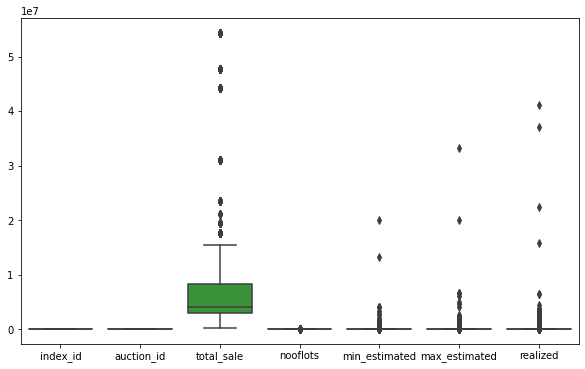

In [54]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# New boxplot using stats_df
sns.boxplot(data=df)

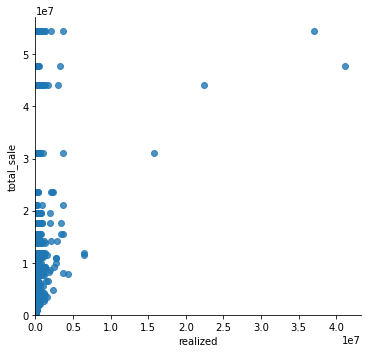

In [55]:
# new scatter plot with sensible axes limits
# Plot using Seaborn
sns.lmplot(x='realized', y='total_sale', data=df,
           fit_reg=False)
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

plt.show()


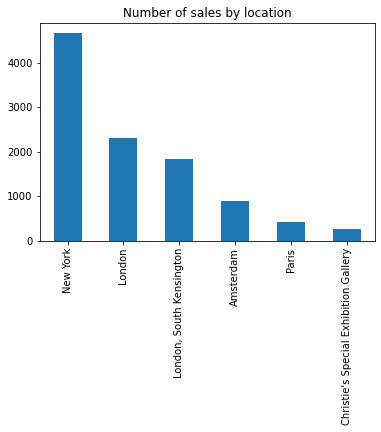

In [56]:
ax = df['location'].value_counts().plot(kind='bar',
                                    title="Number of sales by location")

## Correlation and Heatmap

In [57]:
# check dataset correlation
df.corr()

,index_id,auction_id,total_sale,nooflots,min_estimated,max_estimated,realized
index_id,1.000000,-0.789450,-0.044685,0.462892,-0.038368,-0.036067,-0.034132
auction_id,-0.789450,1.000000,-0.019332,-0.313414,0.016949,0.014970,0.019622
total_sale,-0.044685,-0.019332,1.000000,-0.134907,0.162992,0.159143,0.155354
nooflots,0.462892,-0.313414,-0.134907,1.000000,-0.048330,-0.046058,-0.040898
min_estimated,-0.038368,0.016949,0.162992,-0.048330,1.000000,0.998434,0.927256
max_estimated,-0.036067,0.014970,0.159143,-0.046058,0.998434,1.000000,0.917577
realized,-0.034132,0.019622,0.155354,-0.040898,0.927256,0.917577,1.000000


<AxesSubplot:>

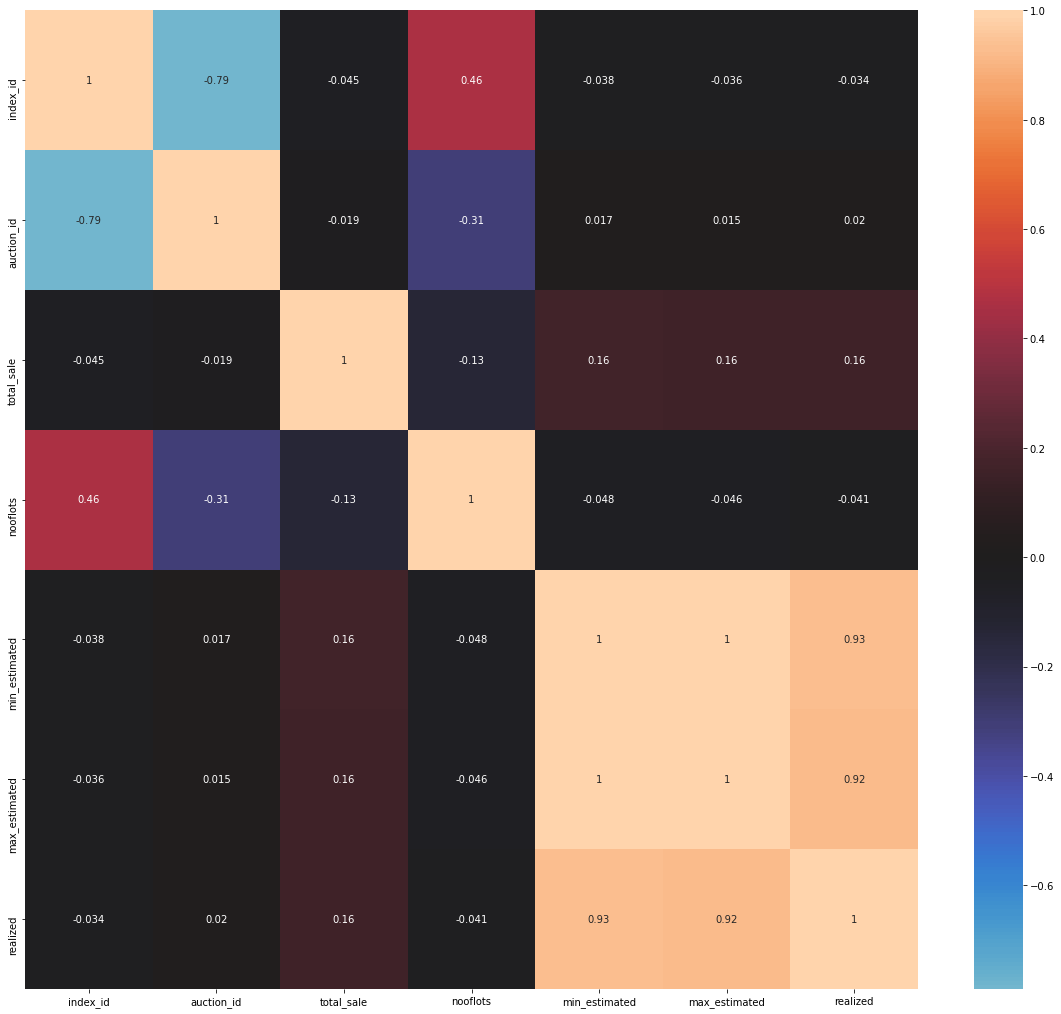

In [58]:
# Calculate correlations
corr = df.corr()
 
# Heatmap
plt.figure(figsize=(20,18))
sns.heatmap(corr,
           center=0,
           annot=True)


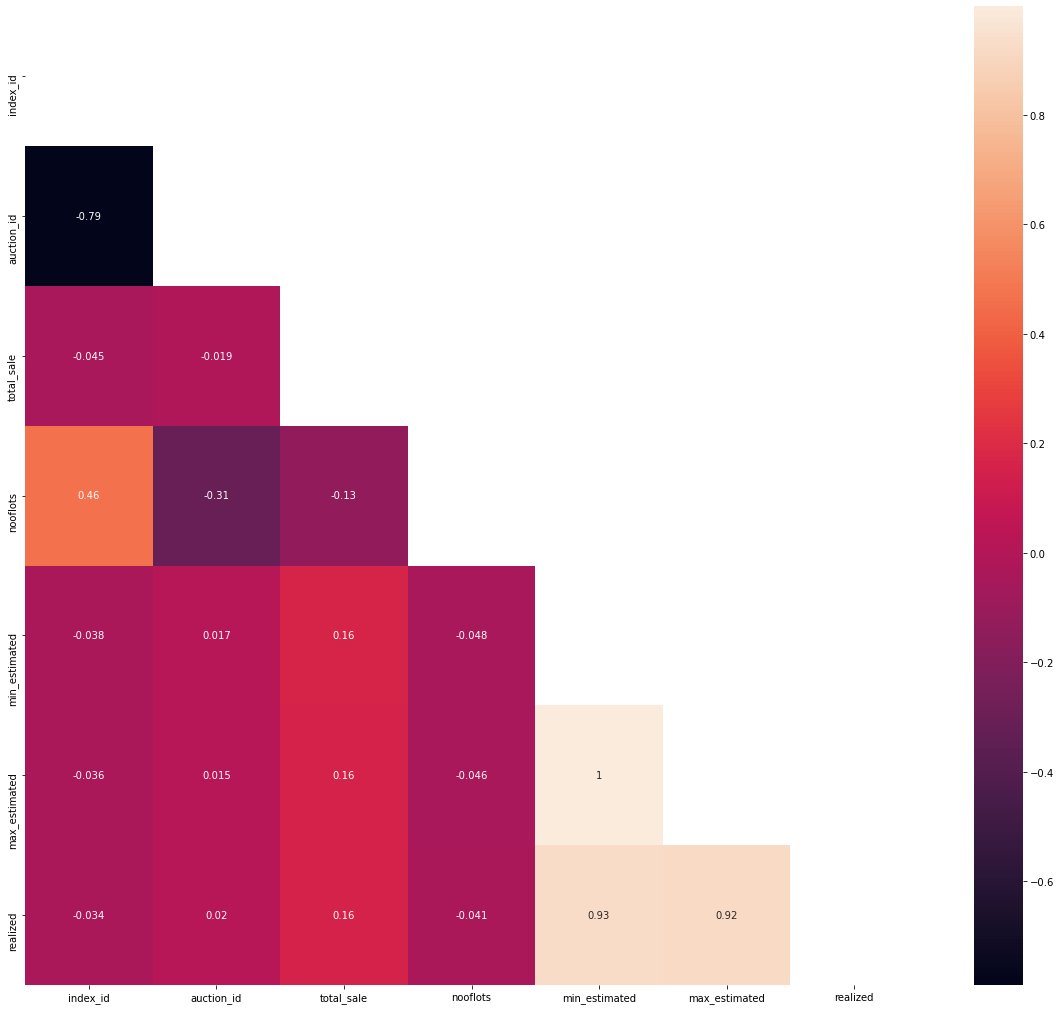

In [59]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)]=True

fig, ax=plt.subplots(figsize=(20, 18))
ax=sns.heatmap(df.corr(), mask=mask, annot=True,)
plt.show()

Text(0, 0.5, 'min_estimated')

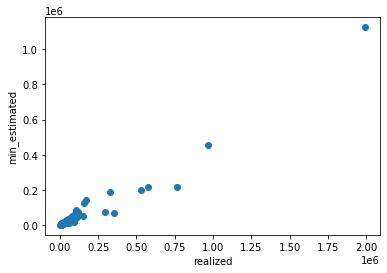

In [60]:
# correlation coefficient price x sqft_above
cap_avg = df.groupby(['total_sale']).mean()
plt.scatter(cap_avg['realized'],cap_avg['min_estimated'])
plt.xlabel('realized')
plt.ylabel('min_estimated')

In [61]:
corr=round(st.pearsonr(cap_avg['realized'],cap_avg['min_estimated'])[0],4)
print(f"The correlation coefficient between realized and min_estimated is {corr}")

The correlation coefficient between realized and min_estimated is 0.9727


In [62]:
model=st.linregress(cap_avg['realized'],cap_avg['min_estimated'])
model

LinregressResult(slope=0.5042448814314909, intercept=-3226.8748571655815, rvalue=0.972740299473903, pvalue=9.949253542273976e-56, stderr=0.013038589890091812, intercept_stderr=3615.1381808400274)

In [63]:
slope=0.4885115294181297
intercept=(-1585.5435758839667)

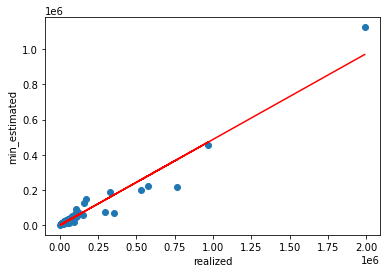

In [64]:
y_values = cap_avg['realized']*slope+intercept

plt.scatter(cap_avg['realized'],cap_avg['min_estimated'])
plt.plot(cap_avg['realized'],y_values,color="red")

plt.xlabel('realized')
plt.ylabel('min_estimated')

plt.show()

In [65]:
corr=round(st.pearsonr(cap_avg['realized'],cap_avg['max_estimated'])[0],4)
print(f"The correlation coefficient between realized and max_estimated is {corr}")

The correlation coefficient between realized and max_estimated is 0.971


In [66]:
model=st.linregress(cap_avg['realized'],cap_avg['max_estimated'])
model

LinregressResult(slope=0.8085516607771093, intercept=-7986.360529306476, rvalue=0.9710422254654605, pvalue=1.2531720994162676e-54, stderr=0.021576984543424722, intercept_stderr=5982.531953827759)

In [67]:
slope=0.7820866176136193
intercept=(-4771.014816350682)

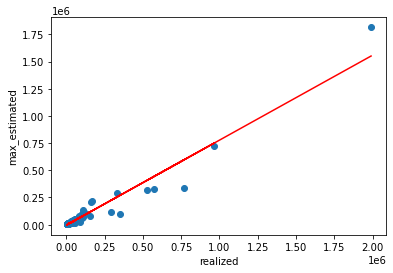

In [68]:
y_values = cap_avg['realized']*slope+intercept

plt.scatter(cap_avg['realized'],cap_avg['max_estimated'])
plt.plot(cap_avg['realized'],y_values,color="red")

plt.xlabel('realized')
plt.ylabel('max_estimated')

plt.show()

## Outliers

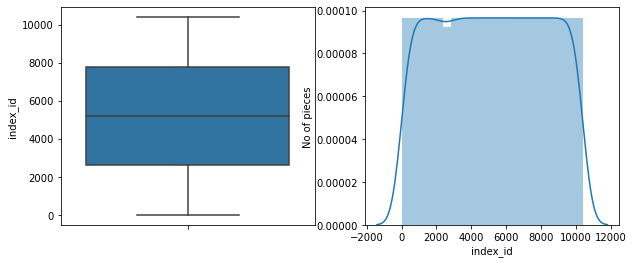

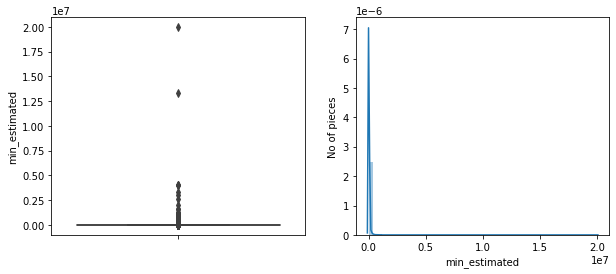

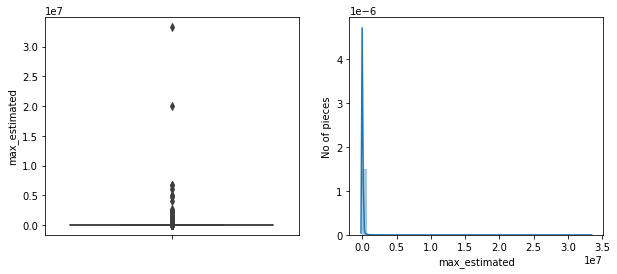

In [69]:
# let's make boxplots to visualise outliers in the continuous variables 
# and histograms to get an idea of the distribution

for var in continuous:
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var].dropna())
    fig.set_ylabel('No of pieces')
    fig.set_xlabel(var)

    plt.show()

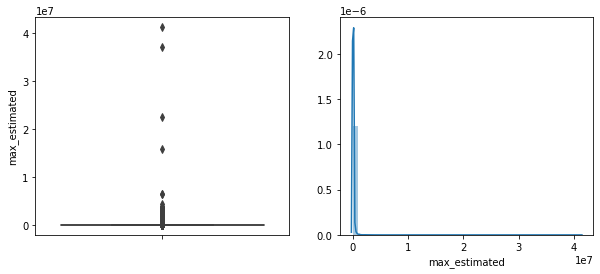

In [70]:
# let's look at the distribution of the target variable

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
fig = sns.boxplot(y=df['realized'])
fig.set_title('')
fig.set_ylabel(var)

plt.subplot(1, 2, 2)
fig = sns.distplot(df['realized'].dropna())#.hist(bins=20)
fig.set_ylabel('')
fig.set_xlabel(var)

plt.show()

the target variable (realized price) is skewed

In [71]:
for var in categorical:
    print(var, ' contains ', len(df[var].unique()), ' labels')

category  contains  31  labels
date  contains  70  labels
location  contains  6  labels
original_currency  contains  3  labels
lot  contains  1116  labels
title  contains  7650  labels
descr  contains  4137  labels
measures  contains  6883  labels


## Modeling

In [72]:
num

,index_id,auction_id,total_sale,nooflots,min_estimated,max_estimated,realized
0,0,19876,6407750,152,6000,8000,8125
1,1,19876,6407750,152,400,600,1500
2,2,19876,6407750,152,8000,12000,18750
3,3,19876,6407750,152,2500,3500,4375
4,4,19876,6407750,152,1500,2500,2500
...,...,...,...,...,...,...,...
10352,10374,5951,1036687,200,600,900,2000
10353,10375,5951,1036687,200,3000,5000,6875
10354,10376,5951,1036687,200,1500,2500,3250
10355,10377,5951,1036687,200,2000,2500,4750


In [73]:
# define the target variable ( y: realized) and the features (x)
X=num.drop('realized', axis=1)
y=df.realized

In [74]:
X.dtypes

index_id         int64
auction_id       int64
total_sale       int64
nooflots         int64
min_estimated    int64
max_estimated    int64
dtype: object

In [75]:
#check the shapes of both X, Y 
print('X shape:', X.shape)
print('Y shape:', y.shape)

X shape: (10357, 6)
Y shape: (10357,)


## Train and test split

In [76]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.25, random_state = 40) # (60% train, 40% test)

In [77]:
import warnings
warnings.simplefilter('ignore')

import statsmodels.api as sm
from statsmodels.formula.api import ols #print OLS Regression Results

X_train_ols=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train_ols).fit() 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               realized   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 1.786e+04
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        12:28:49   Log-Likelihood:            -1.0489e+05
No. Observations:                7767   AIC:                         2.098e+05
Df Residuals:                    7760   BIC:                         2.098e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.442e+04   9674.664     -2.524

### Linear Regression

In [78]:
# create a linear regression variable
lm = LinearRegression()

In [79]:
#train the model
lm.fit(X_train,y_train)

LinearRegression()

In [80]:
lm1 = lm.score(X_test,y_test)
lm1

0.5522792016134455

In [81]:
#Fit over our train data and predict against X test features
y_pred= lm.predict(X_test)

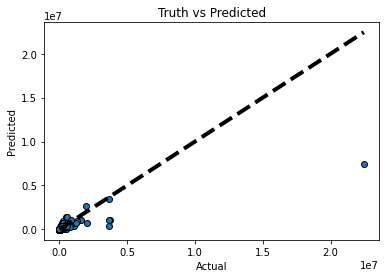

In [82]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=4)
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.set_title("Truth vs Predicted")
# this show function will display the plotting
plt.show()

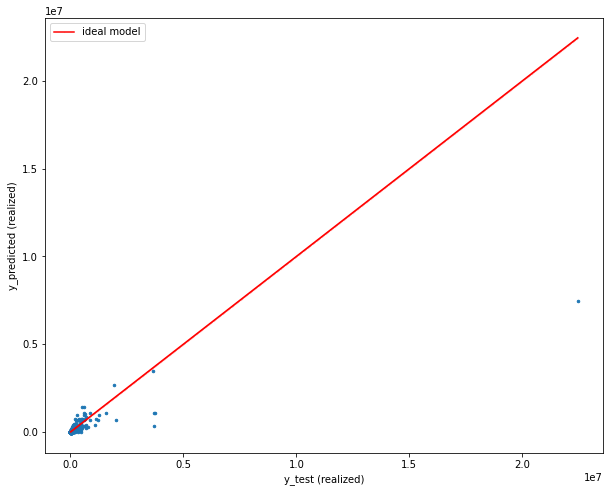

In [83]:
# generate value pairs for an ideal model which predicts the exact same y-value for a given test-y-value
line_x = line_y = np.linspace(min(y_test), max(y_test), num=len(y_test))
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(y_test, y_pred, ms=5, marker=".", ls='')
# plot the ideal model together with our dots
plt.plot(line_x, line_y, ms=0.1, marker=".", ls='-', c='r', label='ideal model')
# show legend
plt.legend();
plt.xlabel('y_test (realized)');
plt.ylabel('y_predicted (realized)');

### R2 and MSE

In [84]:
linreg=LinearRegression()    # model
linreg.fit(X_train, y_train)   # model train
y_pred=linreg.predict(X_test)

In [85]:
print ('train R2: {}, test R2: {}'.format(linreg.score(X_train, y_train),
                                            linreg.score(X_test, y_test)))

train R2: 0.9324826983219836, test R2: 0.5522792016134455


In [86]:
print('R2: ', r2_score(y_test, y_pred))

R2:  0.5522792016134455


In [87]:
train_mse=mean_squared_error(linreg.predict(X_train), y_train)
test_mse=mean_squared_error(linreg.predict(X_test), y_test)

print ('train MSE: {}, test MSE: {}'.format(train_mse, test_mse))

train MSE: 31452034591.137074, test MSE: 101334418424.97743


In [88]:
print('MSE:', mean_squared_error(y_test, y_pred))

MSE: 101334418424.97743


In [89]:
print('Root Mean Square Error RMSE: ', math.sqrt(mean_squared_error(y_test, y_pred)))

Root Mean Square Error RMSE:  318330.6746529109


In [90]:
print('Mean Absolute Error MAE: ', mae(y_test, y_pred))

Mean Absolute Error MAE:  36284.83618286603


### Linear Models

In [91]:
# print in one command Linear Regression, Lasso, Ridge and ElasticNet
def models_automation(models, X_train, y_train):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train: {round(model.score(X_train, y_train),4)}, Test: {round(model.score(X_test, y_test),4)}")

linear_models = [LinearRegression(), Lasso(), Ridge(), ElasticNet()]
models_automation(linear_models, X_train, y_train)

LinearRegression: Train: 0.9325, Test: 0.5523
Lasso: Train: 0.9324, Test: 0.5552
Ridge: Train: 0.9325, Test: 0.5523
ElasticNet: Train: 0.9324, Test: 0.5552


In [92]:
ridge1 = Ridge()
ridge1.fit(X_train, y_train)
ridge1 = ridge1.score(X_train, y_train)
ridge1

0.9324826983219836

In [93]:
elasticnet1 = ElasticNet()
elasticnet1.fit(X_train, y_train)
elasticnet1 = elasticnet1.score(X, y)
elasticnet1

0.8798281277874982

In [94]:
lasso1 = Lasso()
lasso1.fit(X_train, y_train)
lasso1 = lasso1.score(X, y)
lasso1

0.8798281277468853

### KNN

In [95]:
# KNN
knn = [KNeighborsRegressor()]
models_automation(knn, X_train, y_train)

KNeighborsRegressor: Train: 0.6695, Test: 0.1899


In [96]:
knn1 = KNeighborsRegressor()
knn1.fit(X_train, y_train)
knn1 = knn1.score(X, y)
knn1

0.6026778974458842

### Decision trees - Regressor

In [97]:
# Decision tree regressor
dtr = [DecisionTreeRegressor()]
models_automation(dtr, X_train, y_train)

DecisionTreeRegressor: Train: 1.0, Test: 0.262


In [98]:
dtr1 = DecisionTreeRegressor()
dtr1.fit(X_train, y_train)
dtr1 = dtr1.score(X, y)
dtr1

0.9033013441444776

### Random Forest - Regressor

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [100]:
# RandomForestRegressor
rfr = [RandomForestRegressor()]
models_automation(rfr, X_train, y_train)

RandomForestRegressor: Train: 0.9766, Test: 0.4706


In [101]:
rfr1 = RandomForestRegressor()
rfr1.fit(X_train, y_train)
rfr1 = rfr1.score(X, y)
rfr1

0.911816614408054

In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2, 
                       random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)
RandomForestRegressor(...)
print(regr.predict([[0, 0, 0, 0]]))

[-8.32987858]


### Gradient Boosting Regressor

In [103]:
# GradientBoostingRegressor
gbr = [GradientBoostingRegressor()]
models_automation(gbr, X_train, y_train)

GradientBoostingRegressor: Train: 0.9901, Test: 0.394


In [104]:
from sklearn import ensemble
gbr = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [105]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [106]:
gbr1 = gbr.score(X_test,y_test)
gbr1

0.35421510786957977

### Notes

- We didn't have enough data (features) for predicting a model that will predict the price of a new artwork by features. More time and scraping is needed. 
- This models predicts in base of the estimated price that Christie's gives, which will be the final realized price. 
- Linear models work better for that

In [107]:
df

,index_id,category,auction_id,date,location,original_currency,total_sale,nooflots,lot,title,descr,measures,min_estimated,max_estimated,realized
0,0,Antiquities,19876,8 December 2021,London,GBP,6407750,152,1,AN ATTIC BLACK-FIGURED TREFOIL-LIPPED OINOCHOE,"ATTRIBUTED TO THE GELA PAINTER, CIRCA 510-490 ...",6 3⁄4 in. (17.2 cm.) high,6000,8000,8125
1,1,Antiquities,19876,8 December 2021,London,GBP,6407750,152,2,A GREEK MEGARIAN WARE POTTERY BOWL,"HELLENISTIC PERIOD, CIRCA 2ND CENTURY B.C.",5 5⁄8 in. (14.2 cm.) diameter,400,600,1500
2,2,Antiquities,19876,8 December 2021,London,GBP,6407750,152,3,AN ATTIC WHITE-GROUND LEKYTHOS,CIRCA MID 5TH CENTURY B.C.,11 1⁄2 in. (29.2 cm.) high,8000,12000,18750
3,3,Antiquities,19876,8 December 2021,London,GBP,6407750,152,5,SEVEN GREEK TERRACOTTAS,"HELLENISTIC PERIOD, CIRCA 3RD-2ND CENTURY B.C.",4 3⁄8 in. (11 cm.) long max.,2500,3500,4375
4,4,Antiquities,19876,8 December 2021,London,GBP,6407750,152,6,AN ETRUSCAN BRONZE HANDLE FRAGMENT,CIRCA 5TH-4TH CENTURY B.C.,8 3⁄8 in. (21.3 cm.) high,1500,2500,2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10352,10374,Antiquities Including the Plesch Collection of...,5951,28 April 2009,"London, South Kensington",GBP,1036687,200,243,A GREEK STYLE POTTERY MULE HEAD RHYTON,AFTER THE ANTIQUE,8¼ in. (21 cm.) and 12 in. (30.5 cm.) high res...,600,900,2000
10353,10375,Antiquities Including the Plesch Collection of...,5951,28 April 2009,"London, South Kensington",GBP,1036687,200,244,A LARGE ATTIC BLACK GLAZED POTTERY HYDRIA,4TH CENTURY B.C.,24 in. (61 cm.) and 7½ in. (19 cm.) high respe...,3000,5000,6875
10354,10376,Antiquities Including the Plesch Collection of...,5951,28 April 2009,"London, South Kensington",GBP,1036687,200,245,"AN APULIAN RED-FIGURE FISH PLATE, ATTRIBUTED T...",CIRCA 330 B.C.,9 in. (23 cm.) diam.,1500,2500,3250
10355,10377,Antiquities Including the Plesch Collection of...,5951,28 April 2009,"London, South Kensington",GBP,1036687,200,246,"AN APULIAN RED-FIGURE KANTHAROS, ATTRIBUTED TO...",CIRCA 4TH CENTURY B.C.,13 in. (33 cm.) high,2000,2500,4750
